In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [200]:
df = pd.read_excel('supply_chain_data1.xlsx')

In [202]:
print(df.head()) 

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...       Costs   Total Cost  Profit Margin       Profit  \
0                96  ...  187.752075   23

In [204]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [206]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product type                   100 non-null    object 
 1   SKU                            100 non-null    object 
 2   Price                          100 non-null    float64
 3   Availability                   100 non-null    int64  
 4   Number of products sold        100 non-null    int64  
 5   Revenue generated              100 non-null    float64
 6   Customer demographics          100 non-null    object 
 7   Stock levels                   100 non-null    int64  
 8   Lead times                     100 non-null    int64  
 9   Order quantities               100 non-null    int64  
 10  Shipping times                 100 non-null    int64  
 11  Shipping carriers              100 non-null    object 
 12  Shipping costs                 100 non-null    floa

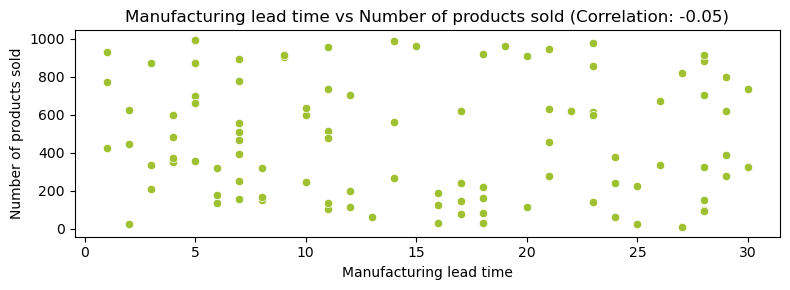

In [208]:
# Calculate correlation between 'Manufacturing lead time' and 'Number of products sold'
Manufacturing_products_corr = df['Manufacturing lead time'].corr(df['Number of products sold'])

plt.figure(figsize=(8, 3))

# Scatter plot for Manufacturing lead time vs Number of products sold
sns.scatterplot(x='Manufacturing lead time', y='Number of products sold', data=df, color='#9fc131')
plt.title(f'Manufacturing lead time vs Number of products sold (Correlation: {Manufacturing_products_corr:.2f})')

plt.tight_layout()
plt.show()

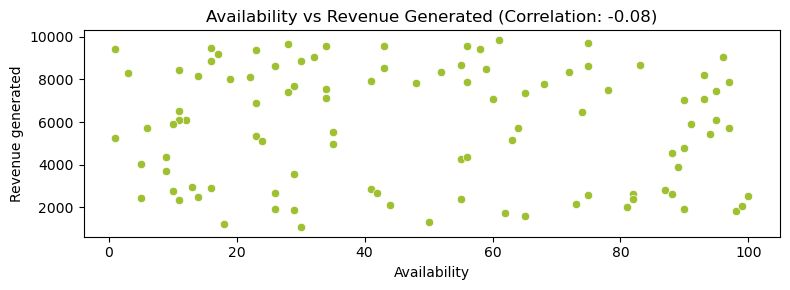

-0.07517047061601037

In [210]:
# Analyze correlation between 'Availability' and 'Revenue generated'
availability_revenue_corr = df['Availability'].corr(df['Revenue generated'])

# Plot these relationships
plt.figure(figsize=(8, 3))

# Scatter plot for Availability vs Revenue generated
sns.scatterplot(x='Availability', y='Revenue generated', data=df, color='#9fc131')
plt.title(f'Availability vs Revenue Generated (Correlation: {availability_revenue_corr:.2f})')

plt.tight_layout()
plt.show()

# Display correlations
availability_revenue_corr

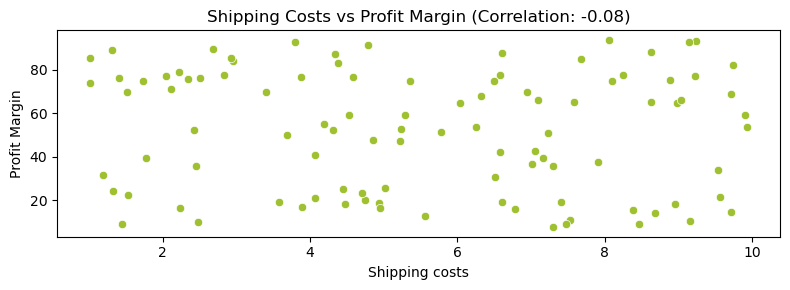

-0.07847430417076078

In [212]:
# Analyze correlation between 'Shipping costs' and 'Profit Margin'
shipping_profit_corr = df['Shipping costs'].corr(df['Profit Margin'])

# Plot these relationships
plt.figure(figsize=(8, 3))

# Scatter plot for Shipping costs vs Profit Margin
sns.scatterplot(x='Shipping costs', y='Profit Margin', data=df,color='#9fc131')
plt.title(f'Shipping Costs vs Profit Margin (Correlation: {shipping_profit_corr:.2f})')

plt.tight_layout()
plt.show()

# Display correlations
shipping_profit_corr

The most frequent Lead times is: 1


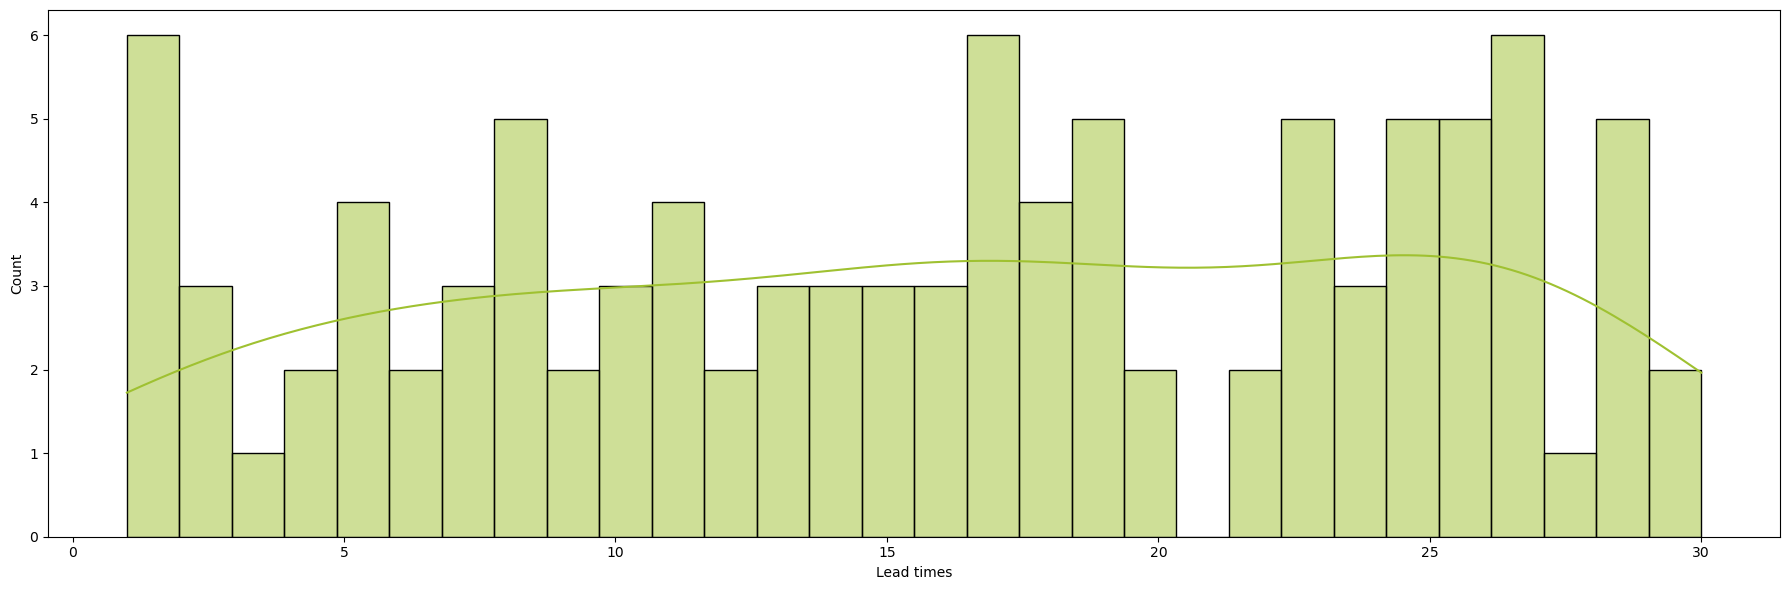

{'Lead Time Average (days)': 15.96,
 'Lead Time Standard Deviation (days)': 8.785801217322359,
 'Order Fulfillment Rate (%)': 98.33401056481105,
 'Inventory Turnover Ratio': 965.019886958342,
 'Average Profit Margin (%)': 51.93987562908452}

In [214]:
# Key Performance Indicators (KPIs) calculations
# Lead Time Analysis
lead_time_avg = df['Lead times'].mean()
lead_time_std = df['Lead times'].std()
# Order Fulfillment Rate (assuming availability can be linked to fulfillment)
order_fulfillment_rate = (df['Availability'].sum() / df['Order quantities'].sum()) * 100
# Inventory Turnover Ratio
inventory_turnover_ratio = df['Number of products sold'].sum() / df['Stock levels'].mean()
# Profit Margin Distribution
profit_margin_avg = df['Profit Margin'].mean()
# Prepare data for visualizations
plt.figure(figsize=(18, 6))

# Lead Time Distribution
most_frequent_value = df['Lead times'].mode()[0]
print(f"The most frequent Lead times is: {most_frequent_value}")
sns.histplot(df['Lead times'], bins=30, kde=True, color='#9FC131')

plt.tight_layout()
plt.show()
# Display KPI calculations as a dictionary for cleaner output
kpi_summary = {
    "Lead Time Average (days)": lead_time_avg,
    "Lead Time Standard Deviation (days)": lead_time_std,
    "Order Fulfillment Rate (%)": order_fulfillment_rate,
    "Inventory Turnover Ratio": inventory_turnover_ratio,
    "Average Profit Margin (%)": profit_margin_avg,
}
kpi_summary

  Customer demographics  Revenue generated
0                Female             6461.0
1                  Male             6030.0
2            Non-binary             5059.0
3               Unknown             5584.0


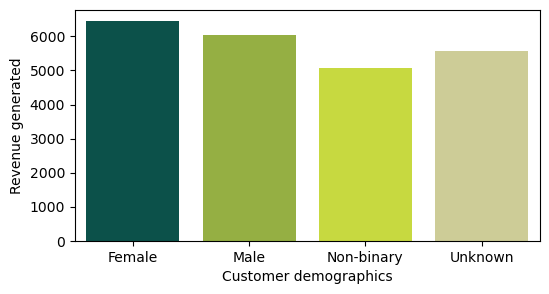

In [216]:
# Group by customer demographics and calculate average revenue generated
demographics_analysis = df.groupby('Customer demographics')['Revenue generated'].mean().round().reset_index()

# Print the analysis for reference
print(demographics_analysis)

# Set the figure size and style
plt.figure(figsize=(6, 3))

# Define custom colors for each demographic
custom_colors = ['#005c53', '#9fc131', '#dbf227', '#D6D58E']  # Add more colors as needed

# Create the bar plot for average revenue by customer demographics
bar_plot = sns.barplot(
    x='Customer demographics',
    y='Revenue generated',
    data=demographics_analysis,
    hue='Customer demographics',
    palette=custom_colors  # Use custom colors
)
# Show the plot
plt.show()

  Product type  Number of products sold
0    cosmetics                    11757
1     haircare                    13611
2     skincare                    20731


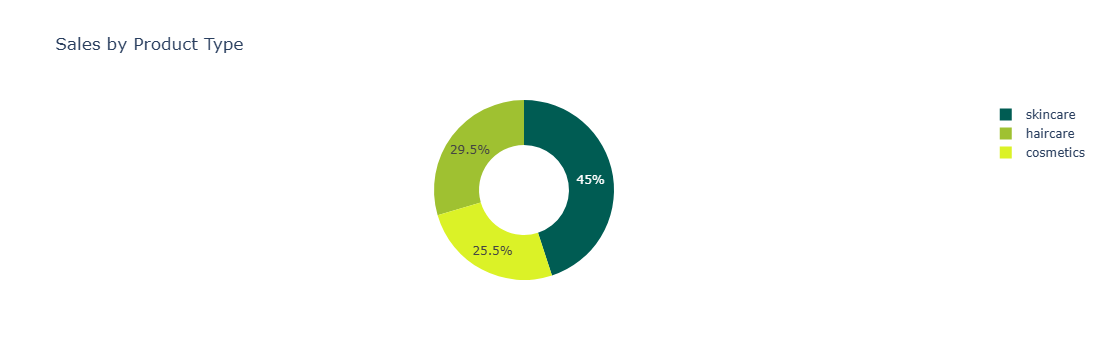

In [226]:
# Assuming df is your DataFrame
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()

# Print the analysis for reference
print(sales_data)

# Create the pie chart with a new color palette
pie_chart = px.pie(
    sales_data, 
    values='Number of products sold', 
    names='Product type',
    title='Sales by Product Type',
    hover_data=['Number of products sold'],
    hole=0.5,
    color_discrete_sequence=['#005C53', '#9FC131', '#DBF227'] 
)
pie_chart.show()

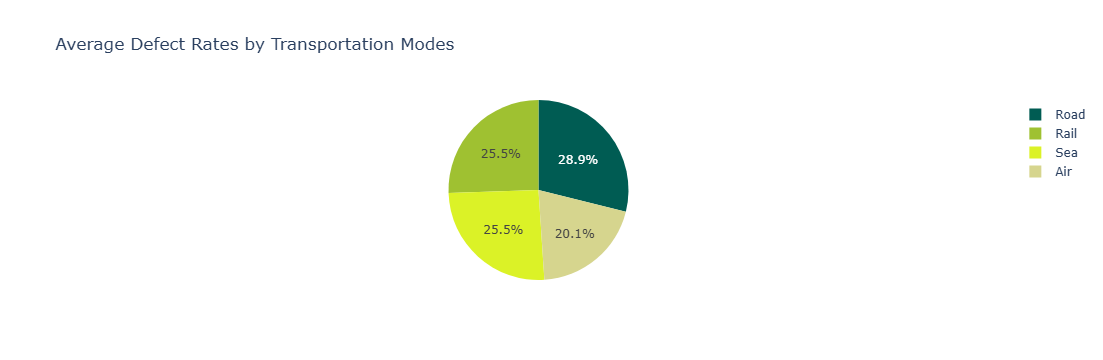

In [228]:
# Create a pivot table for defect rates by transportation modes
pivot_table = pd.pivot_table(df, values='Defect rates',
                             index=['Transportation modes'],
                             aggfunc='mean').reset_index()

# Create a pie chart using the pivot table
transportation_chart = px.pie(pivot_table, 
                               values='Defect rates', 
                               names='Transportation modes', 
                               title='Average Defect Rates by Transportation Modes',
                               color_discrete_sequence=['#005C53', '#9FC131', '#DBF227', '#D6D58E'])
transportation_chart.show()

  Product type  Profit Margin
0    cosmetics    1468.779338
1     haircare    1552.780922
2     skincare    2172.427303


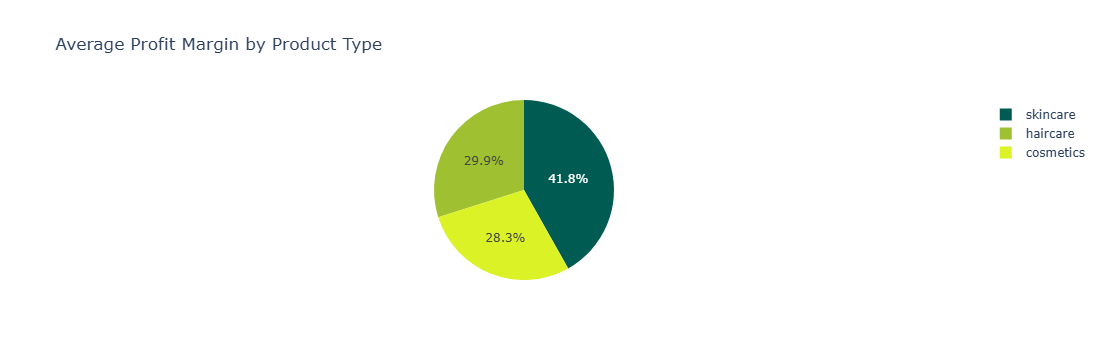

In [230]:
# Assuming df is your DataFrame
sales_data = df.groupby('Product type')['Profit Margin'].sum().reset_index()

# Print the analysis for reference
print(sales_data)

# Create the pie chart with a new color palette
pie_chart = px.pie(
    sales_data, 
    values='Profit Margin', 
    names='Product type',
    title='Average Profit Margin by Product Type',
    hover_data=['Profit Margin'],
    color_discrete_sequence=['#005C53', '#9FC131', '#DBF227']  
)
pie_chart.show()